In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [5]:
data=pd.read_csv('data/headstart.csv')
len_before=len(data.index)
data=data.dropna(how='any',subset=['povrate60','mort_age59_related_postHS','census1960_pop'])
len_after=len(data.index)
print('Dropped',len_before-len_after,'lines that contain NaN.')
threshold=59.1984

Dropped 26 lines that contain NaN.


In [6]:
def ker_tri(x):
    return 2*(1-x)

In [7]:
def ker_rect(x):
    return 1 # Note that the constant here will not affect the result

In [12]:
def get_interval(X,Y,a,b):
    return X[np.logical_and(a<X,X<b)],Y[np.logical_and(a<X,X<b)]

In [91]:
# Left regression only
def bias2(X,Y,t,k,b):
    X,Y=get_interval(X,Y,t-b,t)
    get_weight=np.vectorize(lambda x:k((np.abs(x-t))/b))
    WL=get_weight(X)
    #averages
    X1=X.values.reshape(-1,1)
    X2=np.hstack([X1,X1**2])
    regr1 = linear_model.LinearRegression()
    regr2 = linear_model.LinearRegression()
    regr2.fit(X2, Y, sample_weight=WL)
    regr1.fit(X1,regr2.predict(X2),sample_weight=WL)
    err=(regr1.predict([[t]])-regr2.predict([[t,t**2]]))[0]
    return err**2

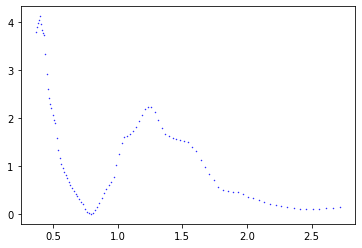

In [92]:
X=data['povrate60']
Y=data['mort_age59_related_postHS']
restriction=Y<=40
X=X[restriction]
Y=Y[restriction]
def test_bandwidth(X,Y,t,k,vald):
    for i in np.exp(np.linspace(-1,1,100)):
        err=(vald(X,Y,t,k,i)+vald(-X,Y,-t,k,i))/2
        plt.scatter(i, err, s=0.2, color='blue')
    plt.show()
    
test_bandwidth(X,Y,threshold,ker_tri,bias2)